In [54]:
import pandas as pd

detail = pd.read_csv('data/detail.csv',index_col=0,encoding='gbk')

# 定义去重函数
def delRep(list1):
    list2=[]
    for i in list1:
        if i not in list2:
            list2.append(i)
    return list2

# 去重
# 提取dishes_name所有数据转化为list
dishes = list(detail['dishes_name'])
print('去重之前的所有菜品总数为：',len(dishes))

dish = delRep(dishes)
print('去重之后的所有菜品总数为：',len(dish))

去重之前的所有菜品总数为： 10037
去重之后的所有菜品总数为： 145


In [4]:
# 利用set方法去重
print('去重之前的所有菜品总数为：',len(dishes))
dish_set = set(dishes)
print('去重之后的所有菜品总数为：',len(dish_set))

去重之前的所有菜品总数为： 10037
去重之后的所有菜品总数为： 145


In [8]:
# 对dashes_name去重
dishes_name = detail['dishes_name'].drop_duplicates()
print('去重之后的所有菜品总数为：',len(dishes_name))

去重之后的所有菜品总数为： 145


In [7]:
#多列去重
print('去重之前订单详情表的形状为：',detail.shape)
shapeDet = detail.drop_duplicates(subset=['order_id','emp_id'])
print('去重之后订单详情表的形状为：',shapeDet.shape)
shapeDet.to_csv('data/shapeDet.csv',sep=',',index=True)

去重之前订单详情表的形状为： (10037, 18)
去重之后订单详情表的形状为： (942, 18)


In [4]:
# 求取销售量和销售价的相似度
corrDet = detail[['counts','amounts']].corr(method='kendall')
print('销量和售价的Kendall法相似度矩阵为：\n',corrDet)

销量和售价的Kendall法相似度矩阵为：
            counts   amounts
counts   1.000000 -0.229968
amounts -0.229968  1.000000


In [7]:
corrDet1 = detail[['counts','amounts','dishes_name']].corr(method='kendall')
print('销量和售价的Kendall法相似度矩阵为：\n',corrDet1)

销量和售价的Kendall法相似度矩阵为：
            counts   amounts
counts   1.000000 -0.279105
amounts -0.279105  1.000000


In [8]:
corrDet2 = detail[['counts','amounts']].corr(method='spearman')
print('销量和售价的Kendall法相似度矩阵为：\n',corrDet2)

销量和售价的Kendall法相似度矩阵为：
            counts   amounts
counts   1.000000 -0.279105
amounts -0.279105  1.000000


In [55]:
# 定义求取特征是否完全相同的矩阵的函数
def featureequals(df):
    dfequals = pd.DataFrame([],columns=df.columns,index=df.columns)
    for i in df.columns:
        for j in df.columns:
            dfequals.loc[i,j] = df.loc[:,i].equals(df.loc[:,j])
    return dfequals

detequals = featureequals(detail)
print('detail特征相等矩阵的前5行5列为：\n',detequals.iloc[:5,:5])
#detequals.to_csv('data/detequals.csv',sep=',',index=True)

detail特征相等矩阵的前5行5列为：
                    order_id  dishes_id  logicprn_name  parent_class_name  \
order_id               True      False          False              False   
dishes_id             False       True          False              False   
logicprn_name         False      False           True               True   
parent_class_name     False      False           True               True   
dishes_name           False      False          False              False   

                   dishes_name  
order_id                 False  
dishes_id                False  
logicprn_name            False  
parent_class_name        False  
dishes_name               True  


In [56]:
# 遍历所有数据
lendet = detequals.shape[0]
dupcol = []

for k in range(lendet):
    for l in range(k+1,lendet):
        if detequals.iloc[k,l] & (detequals.columns[l] not in dupcol):
            dupcol.append(detequals.columns[l])
            
# 进行去重操作
print('需要删除的列为：',dupcol)
detail.drop(dupcol,axis=1,inplace=True)
print('删除多余列后detail的特征数目为：',detail.shape[1])
#detail.to_csv('data/detail_drop.csv',sep=',',index=True)

需要删除的列为： ['parent_class_name', 'cost', 'discount_amt', 'discount_reason', 'kick_back', 'add_info', 'bar_code', 'add_inprice']
删除多余列后detail的特征数目为： 10


In [58]:
print('detail_drop的索引为：\n',detail.index)

detail_drop的索引为：
 Int64Index([2956, 2958, 2961, 2966, 2968, 1899, 1902, 1906, 1907, 1908,
            ...
            5682, 5377, 5680, 5378, 5685, 5683, 5686, 5379, 5380, 5688],
           dtype='int64', name='detail_id', length=10037)


In [40]:
lendet = detequals.shape[0]
print(lendet)

18


In [45]:
# 遍历所有数据
lendet = detequals.shape[0]
dupcol = []

for k in range(lendet):
    print('k:',k)
    print('*'*50)
    for l in range(k+1,lendet):
        print('range(k+1,lendet):',range(k+1,lendet))
        print('l:',l)
        if detequals.iloc[k,l] & (detequals.columns[l] not in dupcol):
            dupcol.append(detequals.columns[l])
            print(dupcol)

k: 0
**************************************************
range(k+1,lendet): range(1, 18)
l: 1
range(k+1,lendet): range(1, 18)
l: 2
range(k+1,lendet): range(1, 18)
l: 3
range(k+1,lendet): range(1, 18)
l: 4
range(k+1,lendet): range(1, 18)
l: 5
range(k+1,lendet): range(1, 18)
l: 6
range(k+1,lendet): range(1, 18)
l: 7
range(k+1,lendet): range(1, 18)
l: 8
range(k+1,lendet): range(1, 18)
l: 9
range(k+1,lendet): range(1, 18)
l: 10
range(k+1,lendet): range(1, 18)
l: 11
range(k+1,lendet): range(1, 18)
l: 12
range(k+1,lendet): range(1, 18)
l: 13
range(k+1,lendet): range(1, 18)
l: 14
range(k+1,lendet): range(1, 18)
l: 15
range(k+1,lendet): range(1, 18)
l: 16
range(k+1,lendet): range(1, 18)
l: 17
k: 1
**************************************************
range(k+1,lendet): range(2, 18)
l: 2
range(k+1,lendet): range(2, 18)
l: 3
range(k+1,lendet): range(2, 18)
l: 4
range(k+1,lendet): range(2, 18)
l: 5
range(k+1,lendet): range(2, 18)
l: 6
range(k+1,lendet): range(2, 18)
l: 7
range(k+1,lendet): range(2, 1

In [59]:
print('detail每个特征缺失的数目为：\n',detail.isnull().sum())
print('detail每个特征非缺失的数目为：\n',detail.notnull().sum())

detail每个特征缺失的数目为：
 order_id                0
dishes_id               0
logicprn_name       10037
dishes_name             0
itemis_add              0
counts                  0
amounts                 0
place_order_time        0
picture_file            0
emp_id                  0
dtype: int64
detail每个特征非缺失的数目为：
 order_id            10037
dishes_id           10037
logicprn_name           0
dishes_name         10037
itemis_add          10037
counts              10037
amounts             10037
place_order_time    10037
picture_file        10037
emp_id              10037
dtype: int64


In [61]:
print('去除缺失列前detail的形状为：',detail.shape)
print('去除缺失列后detail的形状为：',detail.dropna(axis=1,how='any').shape)

去除缺失列前detail的形状为： (10037, 10)
去除缺失列后detail的形状为： (10037, 9)


In [65]:
detail_fillna=detail.fillna(-99)
print('detail中每个特征缺失的数目为：',detail.isnull().sum())
detail_fillna.to_csv('data/detail_fillna.csv',sep=',',index=True)

detail中每个特征缺失的数目为： order_id            0
dishes_id           0
logicprn_name       0
dishes_name         0
itemis_add          0
counts              0
amounts             0
place_order_time    0
picture_file        0
emp_id              0
dtype: int64


In [66]:
## 线性插值
import numpy as np
from scipy.interpolate import interp1d
x=np.array([1,2,3,4,5,8,9,10]) ##创建自变量x
y1=np.array([2,8,18,32,50,128,162,200]) ##创建因变量y1
y2=np.array([3,5,7,9,11,17,19,21]) ##创建因变量y2
LinearInsValue1 = interp1d(x,y1,kind='linear') ##线性插值拟合x,y1
LinearInsValue2 = interp1d(x,y2,kind='linear') ##线性插值拟合x,y2
print('当x为6、7时，使用线性插值y1为：',LinearInsValue1([6,7]))
print('当x为6、7时，使用线性插值y2为：',LinearInsValue2([6,7]))

当x为6、7时，使用线性插值y1为： [ 76. 102.]
当x为6、7时，使用线性插值y2为： [13. 15.]


In [67]:
## 拉格朗日插值
from scipy.interpolate import lagrange
LargeInsValue1 = lagrange(x,y1) ##拉格朗日插值拟合x,y1
LargeInsValue2 = lagrange(x,y2) ##拉格朗日插值拟合x,y2
print('当x为6,7时，使用拉格朗日插值y1为：',LargeInsValue1([6,7]))
print('当x为6,7时，使用拉格朗日插值y2为：',LargeInsValue2([6,7]))

当x为6,7时，使用拉格朗日插值y1为： [72. 98.]
当x为6,7时，使用拉格朗日插值y2为： [13. 15.]


In [72]:
##样条插值
from scipy.interpolate import spline

##样条插值拟合x,y1
SplineInsValue1 = spline(x,y1,xnew=np.array([6,7]))
##样条插值拟合x,y2
SplineInsValue2 = spline(x,y2,xnew=np.array([6,7]))
print('当x为6,7时，使用样条插值y1为：',SplineInsValue1)
print('当x为6,7时，使用样条插值y2为：',SplineInsValue2)

ImportError: cannot import name 'spline' from 'scipy.interpolate' (E:\Anaconda\anaconda\lib\site-packages\scipy\interpolate\__init__.py)

In [75]:
# 定义3∂原则来识别异常数值的函数
def outrange(ser1):
    boolind = (ser1.mean()-3*ser1.std()>ser1)|(ser1.mean()+3*ser1.var()<ser1)
    print(boolind)
    index = np.arange(ser1.shape[0])[boolind]
    print(index)
    outrange = ser1.iloc[index]
    print(outrange)
    return outrange
outlier = outrange(detail['counts'])
print('使用3∂原则判定异常值的个数为：',outlier.shape[0])
print('异常值的最大值为：',outlier.max())
print('异常值的最小值为：',outlier.min())

detail_id
2956    False
2958    False
2961    False
2966    False
2968    False
        ...  
5683    False
5686    False
5379    False
5380    False
5688    False
Name: counts, Length: 10037, dtype: bool
[  94  176  238  270  346  374  390  392  395  405  473  497  523  622
  644  645  646  682  700  769  781  803  804  956 1046 1051 1084 1225
 1243 1251 1276 1290 1299 1317 1351 1388 1477 1482 1526 1534 1553 1554
 1563 1754 1775 1783 1792 1857 1863 2090 2108 2145 2203 2227 2264 2366
 2367 2370 2458 2459 2461 2501 2861 2890 2949 3026 3049 3124 3130 3141
 3374 3472 3497 3503 3518 3523 3585 3603 3698 3720 3794 3855 3975 4026
 4096 4104 4152 4157 4182 4285 4327 4357 4379 4557 4561 4562 4602 4726
 4824 4878 4958 4964 4974 5074 5076 5158 5213 5256 5261 5272 5285 5287
 5306 5526 5565 5723 5753 5876 5877 5879 5896 5978 5981 5987 5989 5992
 6040 6042 6099 6129 6173 6174 6177 6280 6296 6324 6345 6352 6434 6502
 6570 6657 6735 6738 6823 6906 6944 6951 6954 7010 7118 7179 7272 7309
 7405 7411 742

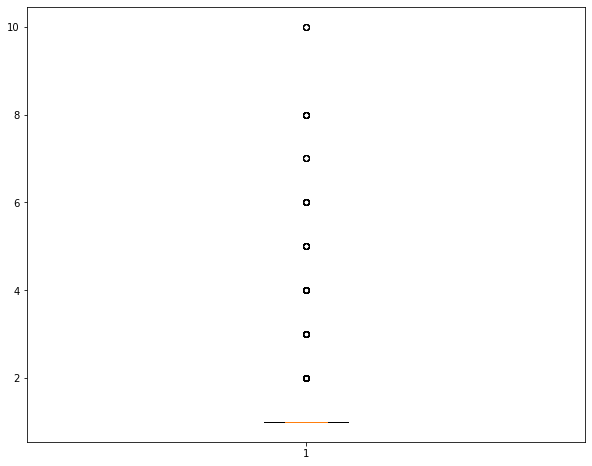

销售量异常值个数为： 516
销售量数据异常值的最大值为： 10
销售量数据异常值的最小值为： 2


In [76]:
import matplotlib.pyplot as plt

# 设置画布
plt.figure(figsize=(10,8))

# 绘制箱线图
p = plt.boxplot(detail['counts'].values,notch=True)
outlier1 = p['fliers'][0].get_ydata() #fliers为异常值的标签
plt.savefig('tmp/菜品异常数据识别.png')
plt.show()
print('销售量异常值个数为：',len(outlier1))
print('销售量数据异常值的最大值为：',outlier1.max())
print('销售量数据异常值的最小值为：',outlier1.min())

In [77]:
outlier1 = p['fliers'][0].get_ydata() #fliers为异常值的标签
print(outlier1)

[ 2  2  2  2  5  2  2  2  2  2  3  2  2  2  2  4  2  4  4  4  2  4 10  4
  6  2  6  6  8  2  2  2  6  6  4  3  4  6  2  6  6  2  8  3  2  2  2  4
  2  2  2  2  3  6  8  2  2  2  2  5  2  2  5  3  4  2  3  2  2  4  8  2
  2  3  3  2  2  2  4  4  2  2  2  4  6  2  3  3  3  2  2  2  2  2  2  3
  2  3  3  2  3  2  4  6  2  2  2  2  2  2  2  2  2  2  4  7  2  2  4  8
  8  4  3  3  3  2  2  2  2  2  2  3  4  6  7  2  2  2  2  2  2  2  4  2
  2  4  2  2  2  4  2  2  6  6  2  4  4  2  3  2  2  2  2  2  5  2  3  2
  3  3  2  4  3  2  8  6  2  2  2  2  6  2  4  2  2  2  2  2  2  3  8  2
  2  2  3  4  2  2  3  2  3  2  6  6  6  2  2  2  4  2  2  8  6  3  2  2
  2  2  2  2  2  2  2  2  2  2 10  4  4  2  2  2  2  6  2  2  2  2  6  2
  6  2  2  7  2  2  2  2  2  4  3  2  8  2  2  2  3  3  2  2  2  7  2  2
  5  2  2  2  2  2  3  3  2  2  2  4  2  5  5  6  2  2  2  2  2  2  2  6
  6  2  2  2  3  2  2  2  3  2  2  4  4  6  3  2  2  2  2  2  2  3  4  7
  4  6  2  2  4  4  2  4  3  2  3  6  3  2  6  5  2